<h1 style='text-align: center;'>Case Study : Automatic Ticket Classification </h1>

<div align="justify">In this notebook contains the case study on ‘Automatic Ticket Classification’. In this case study we will build a model to automatically classify customer complaints for a financial company based on the products and services mentioned in the tickets.</div> 

### Problem Statement:

<div align="justify">For a financial company, customer complaints carry a lot of importance, as they are often an indicator of the shortcomings in their products and services. Efficient resolution of these complaints minimizes customer dissatisfaction and enhances loyalty. This also gives them an idea of how to continuously improve their services/products to attract more customers.<br>

Customer complaints are unstructured text data so Traditionally, evaluating and assigning each ticket to the relevant department is a manual and tedious process, especially for large companies with a vast customer base.<br>

In this case study, we will be working as an NLP engineer for a financial company that wants to automate its customer support tickets system. As a financial company, the firm has many products and services such as credit cards, banking and mortgages/loans.</div>


### Business Goal:

<div align="justify">The goal is to build a model that can classify customer complaints based on the products/services. This will help in quickly segregating tickets into relevant categories, thereby enabling faster resolution of issues.<br>

By using non-negative matrix factorization (NMF) for topic modeling, we will detect patterns and recurring words in the tickets to understand important features for each category. This information will be used to train a supervised model for automatic classification of new complaints.</div>


### Dataset:
The dataset is provided in “.json” format and contains customer complaints with features. we will convert this to a data frame for processing.


### Analysis Approaches:

<div align="justify">To tackle this problem effectively, I have established a structured data analysis approach.<br>

1.	Data Loading: Loading the data from the .json file into a data frame.<br>

2.	Text Preprocessing: Cleaning and preprocessing the text data.<br>

3.	Exploratory Data Analysis (EDA): Performing EDA to understand the structure and characteristics of the data.<br>

4.	Feature Extraction: Extracting relevant features from the text data for modeling.<br>

5.	Topic Modeling: Applying NMF to analyze patterns and classify tickets into five clusters:<br>

- Credit card / Prepaid card
- Bank account services
- Theft/Dispute reporting
- Mortgages/loans
- Others
6.	Model Building Using Supervised Learning: Using the labelled data from topic modelling to train supervised models.<br>

7.	Model Training and Evaluation: Training and evaluating the models based on appropriate metrics.<br>

8.	Model Inference: Using the trained model to classify new customer complaints.</div>


### Importing The Necessary Libraries:

In [12]:
# Importing necessary libraries for data handling, visualization, and NLP:
import json  # For handling JSON data
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import re  # For regular expressions
import nltk  # For natural language processing
import spacy  # For advanced NLP tasks
import string  # For string operations

# To load the small English model from SpaCy:
import en_core_web_sm
nlp = en_core_web_sm.load()

# To import libraries for data visualization:
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For plotting graphs
# To enable inline plotting for Jupyter notebook:
%matplotlib inline

# To suppress warnings:
import warnings
warnings.filterwarnings('ignore')

# To import Plotly for interactive visualizations:
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

# To import Scikit-learn tools for text feature extraction:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

# Pretty print for displaying data in a readable format:
from pprint import pprint

# Import tqdm for progress bar:
from tqdm import tqdm, tqdm_notebook
# Enable tqdm progress bar for pandas operations:
tqdm.pandas()

In [13]:
# To set pandas display options to show maximum width for columns:
pd.set_option('display.max_colwidth', None)  # Display full content in each cell

# To set pandas display options to show all columns:
pd.set_option('display.max_columns', None)  # Display all columns of the dataframe

# To set pandas display options to show all rows:
pd.set_option('display.max_rows', None)  # Display all rows of the dataframe

### Loading The Data:

The data is in JSON format and we need to convert it to a dataframe.

In [14]:
import json
import pandas as pd

# To define the file path:
file_path = r'C:\Users\shish\Desktop\NLP\complaints-2021-05-14_08_16.json'

# Open the JSON file containing complaints data:
with open(file_path, 'r') as f:
    # Load the JSON data into a Python dictionary:
    data = json.load(f)

# Normalize the JSON data into a dataframe:
df = pd.json_normalize(data)

# Display the dataframe:
print(df.head())

                _index      _type      _id  _score   _source.tags  \
0  complaint-public-v2  complaint  3211475     0.0           None   
1  complaint-public-v2  complaint  3229299     0.0  Servicemember   
2  complaint-public-v2  complaint  3199379     0.0           None   
3  complaint-public-v2  complaint  2673060     0.0           None   
4  complaint-public-v2  complaint  3203545     0.0           None   

  _source.zip_code _source.complaint_id                       _source.issue  \
0            90301              3211475   Attempts to collect debt not owed   
1            319XX              3229299     Written notification about debt   
2            77069              3199379  Other features, terms, or problems   
3            48066              2673060      Trouble during payment process   
4            10473              3203545                    Fees or interest   

       _source.date_received _source.state _source.consumer_disputed  \
0  2019-04-13T12:00:00-05:00          

### Data Preparation:

In [15]:
# To check the dataframe to understand its structure and data types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [16]:
# To print the names of all columns in the dataframe:
print("Columns name are: ", df.columns.values)

Columns name are:  ['_index' '_type' '_id' '_score' '_source.tags' '_source.zip_code'
 '_source.complaint_id' '_source.issue' '_source.date_received'
 '_source.state' '_source.consumer_disputed' '_source.product'
 '_source.company_response' '_source.company' '_source.submitted_via'
 '_source.date_sent_to_company' '_source.company_public_response'
 '_source.sub_product' '_source.timely' '_source.complaint_what_happened'
 '_source.sub_issue' '_source.consumer_consent_provided']


### Renaming Column Headers:

In [17]:
# To assign new column names to the dataframe:
df.rename(columns={'_index':'index',
  '_type':'type',
  '_id':'id',
  '_score':'score',
  '_source.tags':'tags',
  '_source.zip_code':'',
 '_source.complaint_id':'complaint_id',
 '_source.issue':'issue',
 '_source.date_received':'date_received',
 '_source.state':'state',
 '_source.consumer_disputed':'consumer_disputed',
 '_source.product':'product',
 '_source.company_response':'company_response',
 '_source.company':'company',
 '_source.submitted_via':'submitted_via',
 '_source.date_sent_to_company':'date_sent_to_company',
 '_source.company_public_response':'company_public_response',
 '_source.sub_product':'sub_product',
 '_source.timely':'timely',
 '_source.complaint_what_happened':'complaint_what_happened',
 '_source.sub_issue':'sub_issue',
 '_source.consumer_consent_provided':'consumer_consent_provided'},inplace=True)

In [18]:
# To replace blank values with NaN in the "complaint_what_happened" column:
df['complaint_what_happened'].replace('', np.nan, inplace=True)

In [19]:
# To count the number of null values in the "complaint_what_happened" column after replacing blanks with NaN:
df['complaint_what_happened'].isnull().sum()

57241

In [20]:
# To remove all rows where the "complaint_what_happened" column is NaN:
df.dropna(subset=['complaint_what_happened'], inplace=True)

### Prepare The Text For Topic Modeling:

Once we have removed all the blank complaints, we need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once we have done these cleaning operations we need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [21]:
# Function to clean the text and remove all the unnecessary elements:
def clean_text(text):
  text=text.lower()  # To convert to lower case
  text=re.sub(r'^\[[\w\s]\]+$',' ',text) # To remove text in square brackets
  text=re.sub(r'[^\w\s]',' ',text) #To remove punctuation
  text=re.sub(r'^[a-zA-Z]\d+\w*$',' ',text) # To remove words with numbers
  return text

### Lemmatization:

In [22]:
# Function to Lemmatize the texts:
stopwords = nlp.Defaults.stop_words  # To define stopwords from SpaCy's default list

def lemmatization(texts):
    lemma_sentences = []  # To initialize an empty list to store lemmatized sentences
    for doc in tqdm(nlp.pipe(texts)):  # To iterate over each text document
        # To lemmatize each token in the document, excluding stopwords
        sent = [token.lemma_ for token in doc if token.text not in set(stopwords)]
        # To join the lemmatized tokens into a single string and append to the list
        lemma_sentences.append(' '.join(sent))
    return lemma_sentences  # To return the list of lemmatized sentences

In [23]:
#To make new dataframe named 'df_clean' that will have only the complaints and the lemmatized complaints: 
df_clean = pd.DataFrame()

In [24]:
# To clean text columns using the clean_text function:
df_clean['complaint_what_happened'] = df['complaint_what_happened'].progress_apply(lambda x: clean_text(x))

100%|██████████| 21072/21072 [00:00<00:00, 37924.18it/s]


In [25]:
# To lemmatize the text in the 'complaint_what_happened' column and store the result in a new column:
df_clean['complaint_what_happened_lemmatized'] = lemmatization(df_clean['complaint_what_happened'])

21072it [08:17, 42.39it/s]


In [26]:
# To add 'category' and 'sub_category' columns to the dataframe for better topic identification:
df_clean['category'] = df['product']
df_clean['sub_category'] = df['sub_product']

### Function to Extract the POS Tags:

In [27]:
# Function to extract the POS tags only for NN:
def extract_pos_tags(texts):
    pos_sentences = []  # To initialize an empty list to store POS-tagged sentences
    for doc in tqdm(nlp.pipe(texts)):  # To iterate over each lemmatized text document
        # To extract tokens that are nouns (NN) and store them in a list
        sent = [token.text for token in doc if token.tag_ == 'NN']
        # To join the extracted nouns into a single string and append to the list
        pos_sentences.append(' '.join(sent))
    return pos_sentences  # To return the list of sentences with only nouns (NN)

df_clean["complaint_POS_removed"] = extract_pos_tags(df_clean['complaint_what_happened_lemmatized'])

21072it [04:14, 82.66it/s]


In [ ]:
# To print the head of the clean dataframe to verify the columns:
print(df_clean.head())

### Exploratory Data Analysis To Get Familiar With The Data:

Code to perform the following task:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




### To visualise the data according to the 'Complaint' character length:

In [29]:
# Code to visualise the data according to the 'Complaint' character length:
# To calculate the character length of different versions of complaints:
df_clean['complaint_length'] = df_clean['complaint_what_happened'].str.len()
df_clean['complaint_what_happened_lemmatized_length'] = df_clean['complaint_what_happened_lemmatized'].str.len()
df_clean['complaint_POS_removed_length'] = df_clean['complaint_POS_removed'].str.len()

# To create a plotly figure:
fig = go.Figure()

# To add histograms for each version of complaints: 
fig.add_trace(go.Histogram(x=df_clean['complaint_length'], name='Complaint', marker_color='#1f77b4'))
fig.add_trace(go.Histogram(x=df_clean['complaint_what_happened_lemmatized_length'], name='Complaint Lemmatized', marker_color='#ff7f0e'))
fig.add_trace(go.Histogram(x=df_clean['complaint_POS_removed_length'], name='Complaint POS Removed', marker_color='#2ca02c'))

# To update layout settings:
fig.update_layout(barmode='overlay', title='Complaint Character Length', xaxis_title='Character Length', yaxis_title='Count')

# To set opacity for better visualization:
fig.update_traces(opacity=0.75)

# To display the plot:
fig.show()

### To find the top 40 words by frequency among all the articles after processing the text:

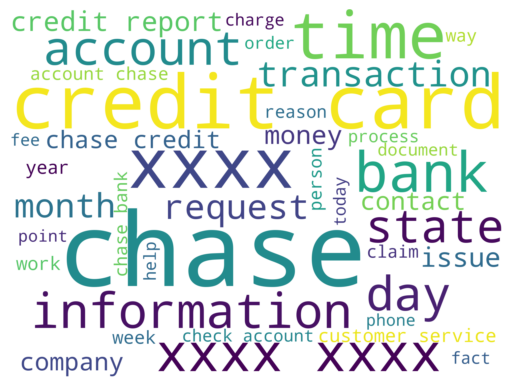

In [31]:
# To find the top 40 words by frequency using a word cloud: 
from wordcloud import WordCloud

# To generate word cloud with the top 40 words by frequency:
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=2000, height=1500, max_words=40).generate(' '.join(df_clean['complaint_POS_removed']))

# To display the word cloud:
plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")
plt.show()

In [32]:
# To remove "-PRON-" from the text corpus in the 'complaint_POS_removed' column and store the result in a new column 'Complaint_clean':
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

### To find the top unigrams, bigrams and trigrams by frequency among all the complaints after processing the text:

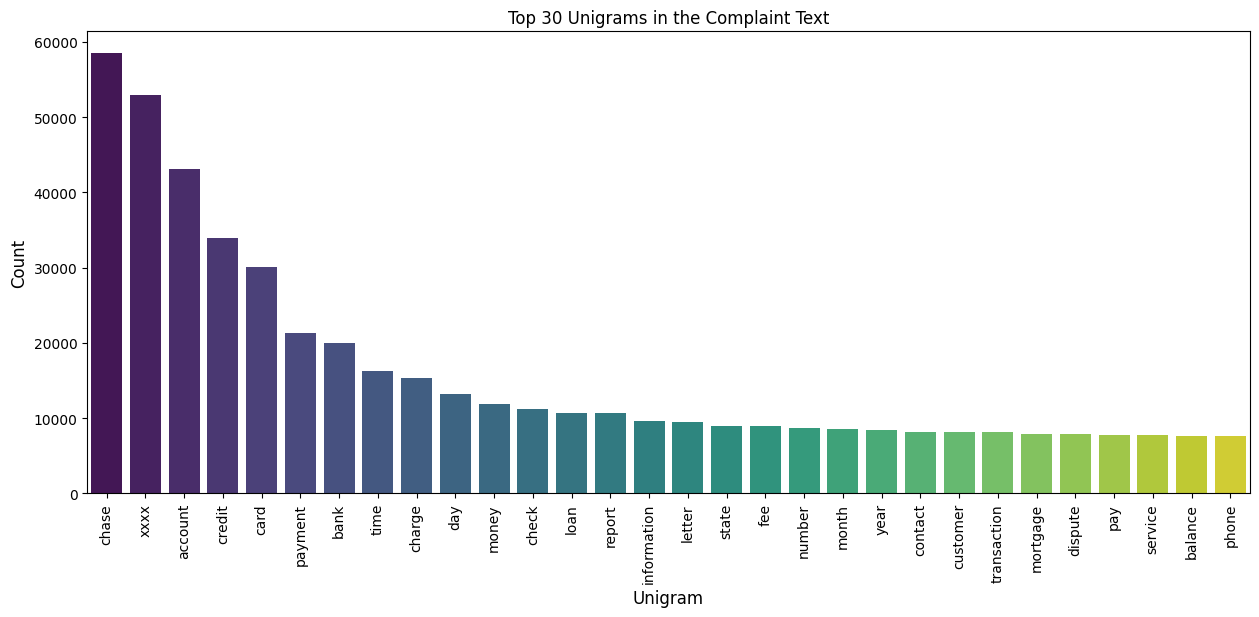

In [33]:
# Function to get the top n words by frequency in a given corpus:
def get_top_n_words(corpus, n=None):
    # To vectorize the corpus and remove English stop words:
    vec = CountVectorizer(stop_words='english').fit(corpus)
    # To transform the corpus into a bag-of-words representation:
    bag_of_words = vec.transform(corpus)
    # Sum the occurrences of each word:
    sum_words = bag_of_words.sum(axis=0)
    # To create a list of words and their respective frequencies:
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    # To sort the words by frequency in descending order:
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 30 unigrams by frequency among all the complaints:
common_words = get_top_n_words(df_clean['complaint_POS_removed'].values.astype('U'), 30)
# To convert the common words into a DataFrame for visualization:
df2 = pd.DataFrame(common_words, columns=['unigram', 'count'])

# To plot the top 30 unigrams:
plt.figure(figsize=(15, 6))
# To create a bar plot:
sns.barplot(x='unigram', y='count', data=df2, palette="viridis")
# To rotate x-axis labels for better readability:
plt.xticks(rotation=90)
# To add a title to the plot:
plt.title("Top 30 Unigrams in the Complaint Text", fontsize=12)
plt.xlabel("Unigram", fontsize=12)
plt.ylabel("Count", fontsize=12)
# To display the plot:
plt.show()

In [34]:
# Function to get the specified top n-grams:
def get_top_n_words(corpus, n=None, count=None):
    # To initialize CountVectorizer to convert text into a matrix of token counts:
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    # To transform the corpus into a bag of words representation:
    bag_of_words = vec.transform(corpus)
    # Sum the counts of each word in the bag of words representation:
    sum_words = bag_of_words.sum(axis=0) 
    # To create a list of tuples containing words and their corresponding frequencies:
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    # Sort the list of tuples based on word frequencies in descending order:
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    # Return the top 'count' n-grams:
    return words_freq[:count]

In [35]:
# To get the top 10 unigrams and print them:
unigram = get_top_n_words(df_clean['Complaint_clean'], 1, 10)
for word, freq in unigram:
    print(word, freq)

# To plot the top 10 unigrams using a bar graph:
import plotly.express as px
fig = px.bar(x=[word for word, freq in unigram], y=[freq for word, freq in unigram], title='Top 10 Unigrams', color=[word for word, freq in unigram], color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

chase 58460
xxxx 52900
account 43065
credit 33912
card 30137
payment 21329
bank 19978
time 16233
charge 15387
day 13243


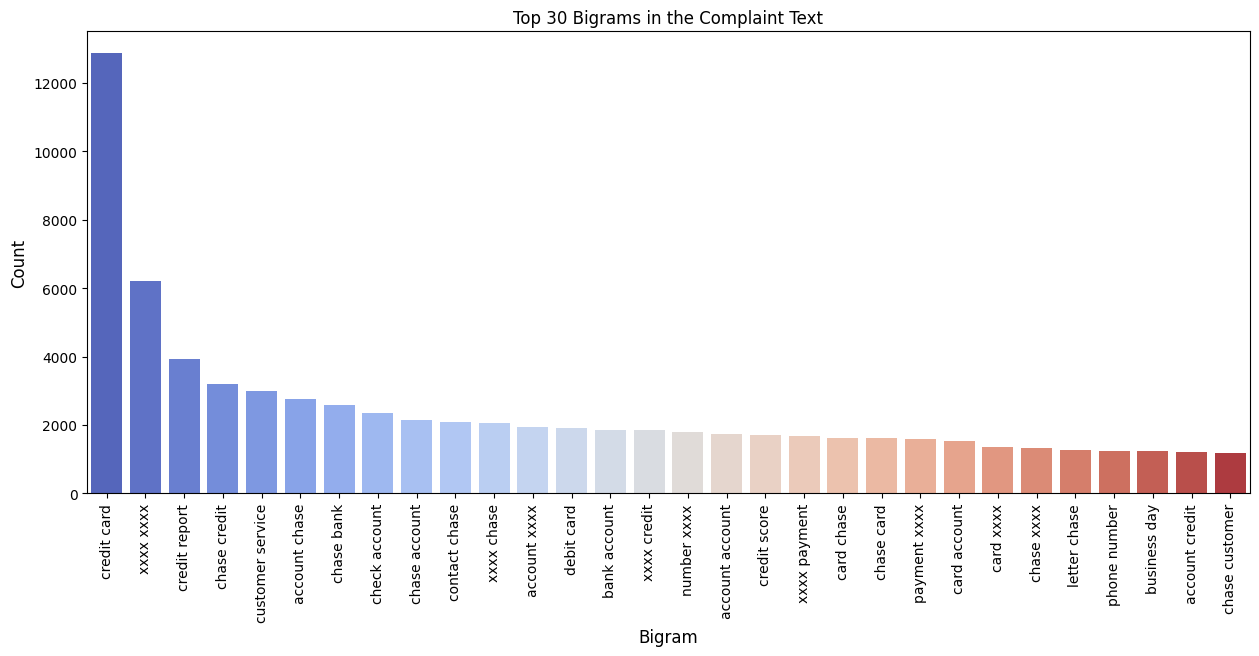

In [36]:
# Function to get the top n bigrams in the corpus:
def get_top_n_bigram(corpus, n=None):
    
    # To initialize the CountVectorizer with bigram range and stop words removal:
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    
    # To transform the corpus into a bag-of-words representation:
    bag_of_words = vec.transform(corpus)
    
    # Sum up the occurrences of each bigram:
    sum_words = bag_of_words.sum(axis=0)
    
    # To create a list of bigrams and their corresponding frequencies:
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    # To sort the bigrams by frequency in descending order:
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    return words_freq[:n]

# To extract the top 30 bigrams from the cleaned complaint text:
common_words = get_top_n_bigram(df_clean['Complaint_clean'].values.astype('U'), 30)

# To create a DataFrame for the top 30 bigrams and their counts:
df3 = pd.DataFrame(common_words, columns=['bigram', 'count'])

# To plot the top 30 bigrams:
plt.figure(figsize=(15, 6))

# To create a bar plot:
sns.barplot(x='bigram', y='count', data=df3, palette="coolwarm")

# To rotate x-axis labels for better readability:
plt.xticks(rotation=90)

# To set plot title and labels:
plt.title("Top 30 Bigrams in the Complaint Text", fontsize=12)
plt.xlabel("Bigram", fontsize=12)
plt.ylabel("Count", fontsize=12)

# To display the plot:
plt.show()

In [37]:
# To get the top 10 bigrams and print them:
bigram = get_top_n_words(df_clean['Complaint_clean'], 2, 10)
for word, freq in bigram:
    print(word, freq)

# To plot the top 10 bigrams using a bar graph :
import plotly.express as px
fig = px.bar(x=[word for word, freq in bigram], y=[freq for word, freq in bigram], title='Top 10 Bigrams', color=[word for word, freq in bigram], color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

credit card 12862
xxxx xxxx 6127
credit report 3927
chase credit 3170
customer service 3004
call chase 2956
chase bank 2579
account chase 2507
check account 2349
chase account 2114


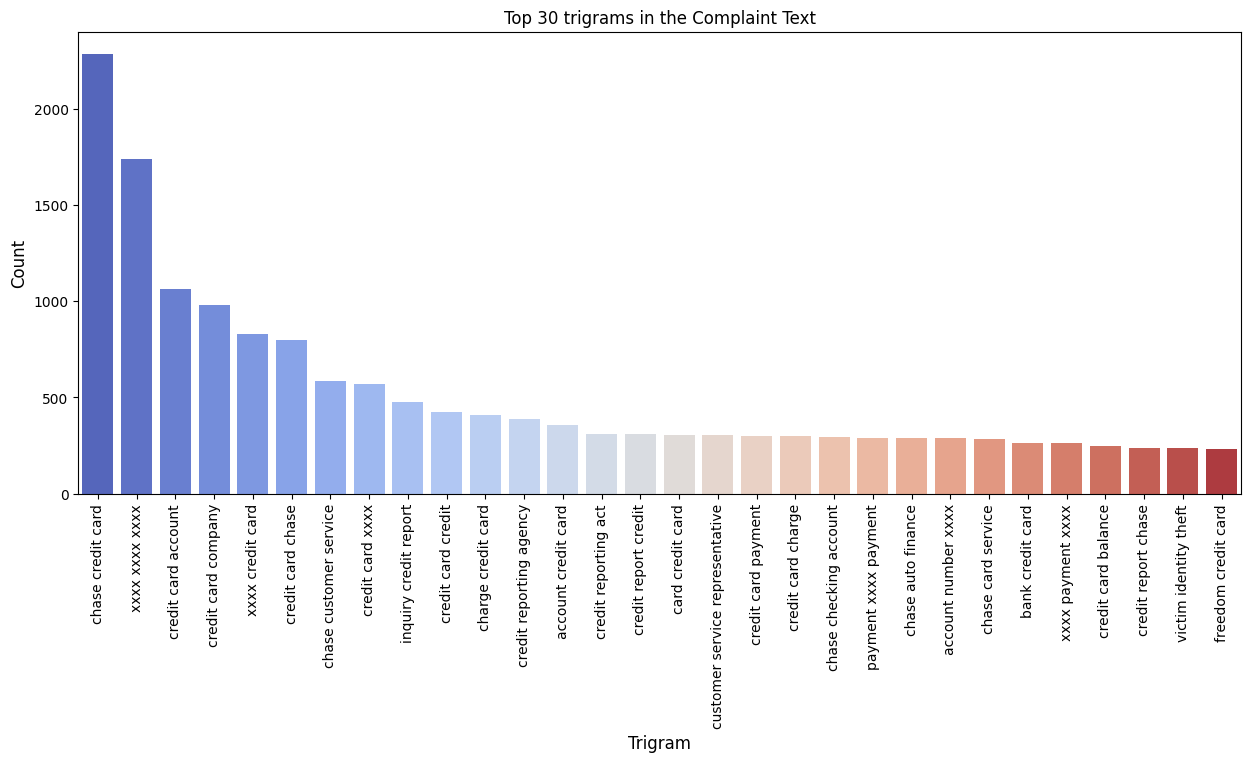

In [38]:
# Function to get the top n trigrams in the corpus:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


# Top 30 trigrams by frequency among all the complaints
common_words = get_top_n_trigram(df_clean['Complaint_clean'].values.astype('U'), 30)
# To create a DataFrame for the top 30 Trigrams and their counts:
df4 = pd.DataFrame(common_words, columns=['trigram', 'count'])

# To plot the top 30 trigrams:
plt.figure(figsize=(15, 6))

# To create a bar plot:
sns.barplot(x='trigram', y='count', data=df4, palette="coolwarm")

# To rotate x-axis labels for better readability:
plt.xticks(rotation=90)

# To set plot title and labels:
plt.title("Top 30 trigrams in the Complaint Text", fontsize=12)
plt.xlabel("Trigram", fontsize=12)
plt.ylabel("Count", fontsize=12)

# To display the plot:
plt.show()

In [39]:
# To get the top 10 trigrams and print them:
trigram = get_top_n_words(df_clean['Complaint_clean'], 3, 10)
for word, freq in trigram:
    print(word, freq)

# To plot the top 10 trigrams using a bar graph: 
import plotly.express as px
fig = px.bar(x=[word for word, freq in trigram], y=[freq for word, freq in trigram], title='Top 10 Trigrams', color=[word for word, freq in trigram], color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

chase credit card 2275
xxxx xxxx xxxx 1713
credit card account 1061
credit card company 977
xxxx credit card 825
credit card chase 762
chase customer service 579
credit card xxxx 550
inquiry credit report 472
credit card credit 411


In [40]:
# To get the top 10 trigrams and print them:
trigram = get_top_n_words(df_clean['Complaint_clean'], 3, 10)
for word, freq in trigram:
    print(word, freq)

# To plot the top 10 trigrams using a bar graph: 
import plotly.express as px
fig = px.bar(x=[word for word, freq in trigram], y=[freq for word, freq in trigram], title='Top 10 Trigrams', color=[word for word, freq in trigram], color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

chase credit card 2275
xxxx xxxx xxxx 1713
credit card account 1061
credit card company 977
xxxx credit card 825
credit card chase 762
chase customer service 579
credit card xxxx 550
inquiry credit report 472
credit card credit 411


#### The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis:

In [41]:
# To replace occurrences of 'xxxx' with an empty string in the 'Complaint_clean' column:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx', '')

In [42]:
# To display the first few rows of the cleaned dataframe to verify the removal of masked texts:
df_clean.head()

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed,complaint_length,complaint_what_happened_lemmatized_length,complaint_POS_removed_length,Complaint_clean
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n 2018 write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,Debt collection,Credit card debt,morning help bank service write chase debt verification statement bank validate debt mail month attempt debt information consumer chase account xxxx help,486,311,153,morning help bank service write chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help
2,i upgraded my xxxx xxxx card in xx xx 2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card xx xx 2018 tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xx xx xxxx xx xx xxxx consent xxxx recording agent mislead,Credit card or prepaid card,General-purpose credit card or charge card,card agent upgrade anniversary date change agent information order upgrade account xxxx anniversary date xxxx consent agent,355,229,123,card agent upgrade anniversary date change agent information order upgrade account anniversary date consent agent
10,chase card was reported on xx xx 2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report xx xx 2019 fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,"Credit reporting, credit repair services, or other personal consumer reports",Other personal consumer report,chase card report application submit identity consent service credit verify identity applicant,224,149,94,chase card report application submit identity consent service credit verify identity applicant
11,on xx xx 2018 while trying to book a xxxx xxxx ticket i came across an offer for 300 00 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than 10mins after putting in the application on xx xx 2018 notwithstanding my explic

### Feature Extraction:
To convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [43]:
# Code to initialise the TfidfVectorizer: 
from sklearn.feature_extraction.text import TfidfVectorizer

# To initialize a TF-IDF Vectorizer:
tf_idf_vec = TfidfVectorizer(
    max_df=0.98,     # Ignore terms that occur in more than 98% of the documents
    min_df=2,        # Ignore terms that occur in fewer than 2 documents
    stop_words='english'  # Remove common English stopwords during tokenization
)

### To Create A Document Term Matrix Using fit_transform:

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [44]:
# Code to create the Document Term Matrix by transforming the complaints column present in df_clean:
# Fit and transform the TF-IDF Vectorizer on the 'Complaint_clean' column:
tfidf = tf_idf_vec.fit_transform(df_clean['Complaint_clean'])

### Topic Modelling Using NMF:

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task we have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [45]:
# To import Non-Negative Matrix Factorization (NMF) from scikit-learn's decomposition module:
from sklearn.decomposition import NMF

### Manual Topic Modeling:
We need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good our final topics are.

In [46]:
# To define the number of topics/components for the NMF model:
num_topics = 5

# To initialize the NMF model with the specified number of components and random state:
nmf_model = NMF(n_components=num_topics, random_state=40)

In [47]:
# To fit the NMF model to the TF-IDF matrix:
nmf_model.fit(tfidf)

# To get the number of features (i.e., vocabulary size) from the TF-IDF Vectorizer:
vocab_size = len(tf_idf_vec.get_feature_names_out())

In [48]:
# To print the top 15 words for each topic:
for index, topic in enumerate(nmf_model.components_):
    # To print the topic number:
    print(f'THE TOP 15 WORDS FOR TOPIC #{index} with tf-idf score')
    # To get the feature names for the top 15 words in the topic using tf_idf_vec:
    top_words = [tf_idf_vec.get_feature_names_out()[i] for i in topic.argsort()[-15:]]
    # To print the top 15 words:
    print(top_words)
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0 with tf-idf score
['claim', 'customer', 'transaction', 'business', 'number', 'transfer', 'day', 'branch', 'fund', 'chase', 'deposit', 'money', 'bank', 'check', 'account']


THE TOP 15 WORDS FOR TOPIC #1 with tf-idf score
['service', 'time', 'reason', 'application', 'month', 'point', 'purchase', 'year', 'limit', 'score', 'account', 'balance', 'chase', 'credit', 'card']


THE TOP 15 WORDS FOR TOPIC #2 with tf-idf score
['date', 'statement', 'balance', 'property', 'rate', 'pay', 'year', 'time', 'home', 'modification', 'month', 'chase', 'mortgage', 'loan', 'payment']


THE TOP 15 WORDS FOR TOPIC #3 with tf-idf score
['dispute', 'letter', 'score', 'theft', 'remove', 'file', 'identity', 'account', 'reporting', 'debt', 'information', 'company', 'credit', 'inquiry', 'report']


THE TOP 15 WORDS FOR TOPIC #4 with tf-idf score
['statement', 'time', 'email', 'contact', 'service', 'fraud', 'purchase', 'refund', 'claim', 'merchant', 'transaction', 'chase', 'fee', 'disp

In [49]:
# To create the best topic for each complaint in terms of integer value 0,1,2,3 & 4:
topic_values = nmf_model.transform(tfidf)
topic_values.argmax(axis=1)

array([0, 1, 3, ..., 3, 1, 2], dtype=int64)

In [50]:
# To assign the best topic to each complaint in a new 'Topic' column:
df_clean['Topic'] = topic_values.argmax(axis=1)

In [51]:
# To display the first few rows of the cleaned dataframe with the 'Topic' column:
df_clean.head()

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed,complaint_length,complaint_what_happened_lemmatized_length,complaint_POS_removed_length,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n 2018 write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,Debt collection,Credit card debt,morning help bank service write chase debt verification statement bank validate debt mail month attempt debt information consumer chase account xxxx help,486,311,153,morning help bank service write chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help,0
2,i upgraded my xxxx xxxx card in xx xx 2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card xx xx 2018 tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xx xx xxxx xx xx xxxx consent xxxx recording agent mislead,Credit card or prepaid card,General-purpose credit card or charge card,card agent upgrade anniversary date change agent information order upgrade account xxxx anniversary date xxxx consent agent,355,229,123,card agent upgrade anniversary date change agent information order upgrade account anniversary date consent agent,1
10,chase card was reported on xx xx 2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report xx xx 2019 fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,"Credit reporting, credit repair services, or other personal consumer reports",Other personal consumer report,chase card report application submit identity consent service credit verify identity applicant,224,149,94,chase card report application submit identity consent service credit verify identity applicant,3
11,on xx xx 2018 while trying to book a xxxx xxxx ticket i came across an offer for 300 00 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than 10mins after putting in the application on xx xx 2018 notwithstandi

In [52]:
# To print the first 5 Complaint for each of the Topics:
df_clean.groupby('Topic').head(5).sort_values(by='Topic')

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed,complaint_length,complaint_what_happened_lemmatized_length,complaint_POS_removed_length,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n 2018 write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,Debt collection,Credit card debt,morning help bank service write chase debt verification statement bank validate debt mail month attempt debt information consumer chase account xxxx help,486,311,153,morning help bank service write chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help,0
24,mishandling of this account by chase auto and xxxx,mishandle account chase auto xxxx,Vehicle loan or lease,Loan,mishandle account chase auto xxxx,51,33,33,mishandle account chase auto,0
17,with out notice j p morgan chase restricted my account by my debit card tuesday xx xx 2019 on thursday xx xx 2019 i went into a branch after being advised by a customer service representative that my account would actually be closed i went into the branch to see how i can remove the funds that are in there currently in as well as if my direct deposit from my place of employment would be returned the bank associate and the customer service representative assured me that the funds would post but they may take an additional business day that saturday i attempted to go inside of a branch yet again to retrieve my funds that actually did post on friday xx xx 2019 upon looking at my account i realize that the funds have been reversed and no longer were present on my current statement ive been called and i was told that it may take two business day stating tuesday xx xx xxxx would be the date that my funds would be available to withdraw from a bank teller only now chase is informing me that i will be mailed a check into the three business days to recover the funds that are owed to me and left in my account currently unfortunately this has put me in an additional financial bind do two fees from late rent late car payments etc i am not being a short or giving written notice that these things will actually occur so that i have peace of mind in fact chase has handled my situation grossly i even had a bank teller inform me that my account looks suspicious after giving me a suspicious look myself although i know that chase reserves the right to close my account at any time i do believe that their protocol has been in the past to give notice in the form of a written document i am not being a shored or giving written notice that these things will actually occur so that i have peace of mind in fact chase has handled my situation grossly i even had a bank teller inform me that my account looks suspicious after giving me a suspicious look myself although i know that chase reserves the right to close my account at any time i do believe that their protocol has been in the past to give notice in the form of a written document this situation is truly affecting my livelihood and they dont seem to want to deal with me professionally thank you,notice j p morgan chase restrict account debit card tuesday xx xx 2019 thursday xx xx 2019 go branch advise customer service representative account actually close go branch remove fund currently 

### After evaluating the mapping, we will assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [53]:
# To create a dictionary to map topic numbers to their names:
Topic_names = {
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    4: 'Mortgage/Loan'
}

# To replace topic numbers with their names in a new column 'Topic_category':
df_clean['Topic_category'] = df_clean['Topic'].map(Topic_names)

In [54]:
# To display the first few rows of the cleaned dataframe with the updated 'Topic_category' column:
df_clean.head()

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed,complaint_length,complaint_what_happened_lemmatized_length,complaint_POS_removed_length,Complaint_clean,Topic,Topic_category
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n 2018 write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,Debt collection,Credit card debt,morning help bank service write chase debt verification statement bank validate debt mail month attempt debt information consumer chase account xxxx help,486,311,153,morning help bank service write chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help,0,Bank Account services
2,i upgraded my xxxx xxxx card in xx xx 2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card xx xx 2018 tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xx xx xxxx xx xx xxxx consent xxxx recording agent mislead,Credit card or prepaid card,General-purpose credit card or charge card,card agent upgrade anniversary date change agent information order upgrade account xxxx anniversary date xxxx consent agent,355,229,123,card agent upgrade anniversary date change agent information order upgrade account anniversary date consent agent,1,Credit card or prepaid card
10,chase card was reported on xx xx 2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report xx xx 2019 fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,"Credit reporting, credit repair services, or other personal consumer reports",Other personal consumer report,chase card report application submit identity consent service credit verify identity applicant,224,149,94,chase card report application submit identity consent service credit verify identity applicant,3,Theft/Dispute Reporting
11,on xx xx 2018 while trying to book a xxxx xxxx ticket i came across an offer for 300 00 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all h

### Supervised model to predict any new complaints to the relevant Topics:

We have now build the model to create the topics for each complaints. Now in the below section we will use them to classify any new complaints.

Since we will be using supervised learning technique we have to convert the topic names to numbers (numpy arrays only understand numbers).

In [55]:
# To create a new DataFrame containing only the specified columns (Keeping the columns"complaint_what_happened" & "Topic" only ):
training_data = df_clean[['complaint_what_happened', 'Topic']]

In [56]:
# To display the first few rows of the training_data DataFrame:
training_data.head()

,complaint_what_happened,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,0
2,i upgraded my xxxx xxxx card in xx xx 2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,1
10,chase card was reported on xx xx 2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,3
11,on xx xx 2018 while trying to book a xxxx xxxx ticket i came across an offer for 300 00 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than 10mins after putting in the application on xx xx 2018 notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on xx xx 2018 this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,3
14,my grand son give me check for 1600 00 i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to verify the check owner he is out the country most the time date happen xx xx 2018 check number xxxx claim number is xxxx with chase,0


### Apply the supervised models on the training data created. In this process, we have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# To initialize a CountVectorizer:
count_vect = CountVectorizer()

# To get the vector count:
X_train_counts = count_vect.fit_transform(training_data['complaint_what_happened'])

# To initialize a TfidfTransformer:
tfidf_transformer = TfidfTransformer()

# To transform the word vector to tf-idf:
X_train_tf = tfidf_transformer.fit_transform(X_train_counts)

### Checking For Class Imbalance:

In [58]:
import plotly.express as px

# To calculate the class imbalance ratios:
imbalance_ratios = training_data['Topic'].value_counts(normalize=True)

# To create a bar plot:
fig = px.bar(
    x=imbalance_ratios.index,
    y=imbalance_ratios.values,
    title='Class Imbalance',
    color=imbalance_ratios.index,
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.show()

#### Observations: Given that the class imbalance in the data is present but not extreme, we have decided against using any sampling techniques for balancing. Instead, we will employ the F1 score as the evaluation metric and utilize stratified k-fold cross-validation for model assessment.

### Model Building:

We will try these models on the train & test data:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

In [60]:
# Importing models:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

# Importing tools for model evaluation and tuning:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

### Train Test Split:

In [61]:
# Splitting the data into training and test sets:
train_X, test_X, train_y, test_y = train_test_split(X_train_tf, training_data['Topic'], test_size=0.2, random_state=40)

In [62]:
# Function to evaluate the model and display the results:
def eval_model(y_test, y_pred, y_pred_proba, type='Training'):
    # To print evaluation results header:
    print(type, 'results')
    
    # To calculate and print accuracy:
    accuracy = accuracy_score(y_test, y_pred).round(2)
    print('Accuracy:', accuracy)
    
    # To calculate and print precision:
    precision = precision_score(y_test, y_pred, average='weighted').round(2)
    print('Precision:', precision)
    
    # To calculate and print recall:
    recall = recall_score(y_test, y_pred, average='weighted').round(2)
    print('Recall:', recall)
    
    # To calculate and print F1 score:
    f1 = f1_score(y_test, y_pred, average='weighted').round(2)
    print('F1 Score:', f1)
    
    # To calculate and print ROC AUC score:
    roc_auc = roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovr').round(2)
    print('ROC AUC Score:', roc_auc)
    
    # To print classification report:
    print('Classification Report:', classification_report(y_test, y_pred))
    
    # To compute the confusion matrix:
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=training_data['Topic'].unique())
    disp.plot()

In [63]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Function to grid search the best parameters for the model:
def run_model(model, param_grid):
    # To define cross-validation strategy:
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)
    
    # To perform grid search:
    grid = GridSearchCV(model, param_grid=param_grid, cv=cv, scoring='f1_weighted', verbose=1, n_jobs=-1)
    grid.fit(train_X, train_y)
    
    # Return the best estimator found by grid search:
    return grid.best_estimator_

### 1.  Logistic Regression:

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Training results
Accuracy: 0.94
Precision: 0.95
Recall: 0.94
F1 Score: 0.94
ROC AUC Score: 1.0
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.94      0.95      4164
           1       0.94      0.95      0.94      3131
           2       0.97      0.96      0.96      4077
           3       0.91      0.97      0.94      1871
           4       0.93      0.92      0.93      3614

    accuracy                           0.94     16857
   macro avg       0.94      0.95      0.94     16857
weighted avg       0.95      0.94      0.94     16857

Test results
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
ROC AUC Score: 0.99
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1032
           1       0.92      0.93      0.93       778
           2       0.95      0.94      0.95      1

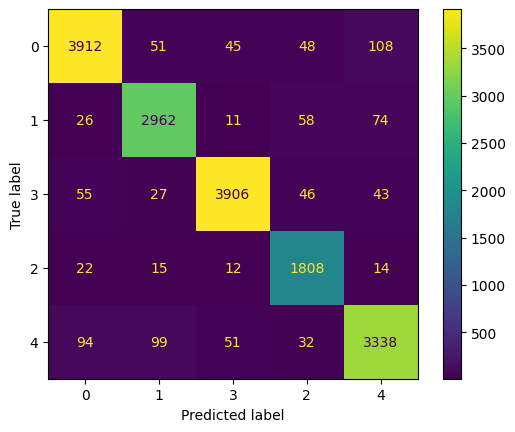

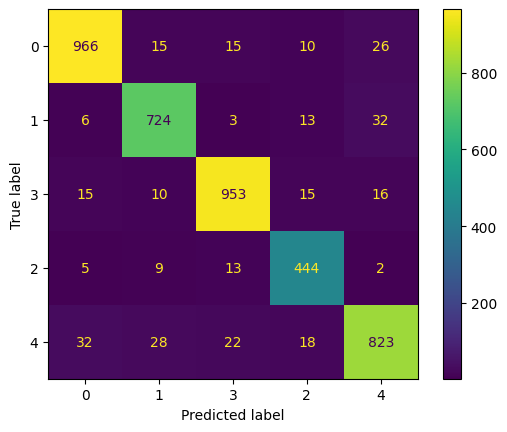

In [64]:
# To define hyperparameter grid for Logistic Regression:
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 500, 1000],
    'class_weight': [None, 'balanced']
}

# To run grid search to find the best Logistic Regression model:
model = run_model(LogisticRegression(), params)

# To evaluate the model on training data:
eval_model(train_y, model.predict(train_X), model.predict_proba(train_X), type='Training')

# To evaluate the model on test data:
eval_model(test_y, model.predict(test_X), model.predict_proba(test_X), type='Test')

### 2.  Decision Tree:

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits
Training results
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.87
ROC AUC Score: 0.99
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.90      0.88      4164
           1       0.87      0.88      0.87      3131
           2       0.90      0.90      0.90      4077
           3       0.85      0.82      0.84      1871
           4       0.85      0.82      0.83      3614

    accuracy                           0.87     16857
   macro avg       0.87      0.86      0.86     16857
weighted avg       0.87      0.87      0.87     16857

Test results
Accuracy: 0.77
Precision: 0.77
Recall: 0.77
F1 Score: 0.77
ROC AUC Score: 0.91
Classification Report:               precision    recall  f1-score   support

           0       0.78      0.81      0.79      1032
           1       0.79      0.78      0.78       778
           2       0.82      0.84      0.83     

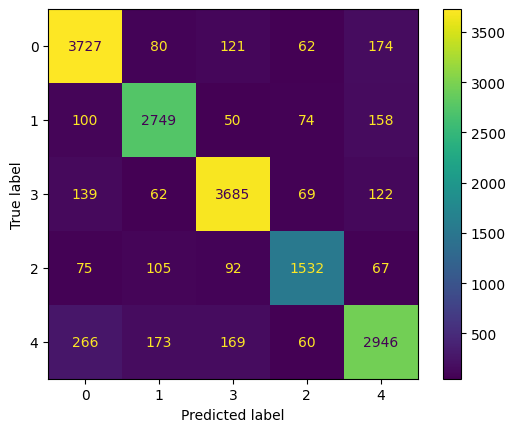

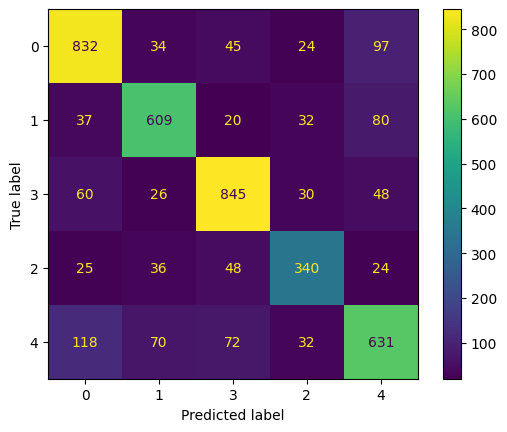

In [65]:
# To define hyperparameter grid for Decision Tree:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# To run grid search to find the best Decision Tree model:
model = run_model(DecisionTreeClassifier(), params)

# To evaluate the model on training data:
eval_model(train_y, model.predict(train_X), model.predict_proba(train_X), type='Training')

# To evaluate the model on test data:
eval_model(test_y, model.predict(test_X), model.predict_proba(test_X), type='Test')

### 3.  Random Forest:

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training results
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
ROC AUC Score: 1.0
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4164
           1       0.98      0.99      0.99      3131
           2       0.98      0.99      0.98      4077
           3       0.98      0.97      0.98      1871
           4       0.99      0.97      0.98      3614

    accuracy                           0.98     16857
   macro avg       0.98      0.98      0.98     16857
weighted avg       0.98      0.98      0.98     16857

Test results
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84
ROC AUC Score: 0.97
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.85      0.86      1032
           1       0.83      0.86      0.85       778
           2       0.85      0.89      0.87      100

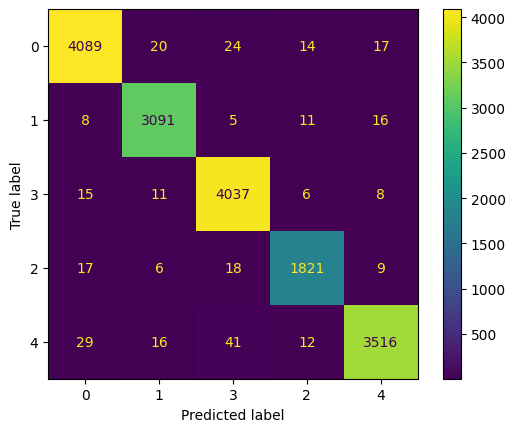

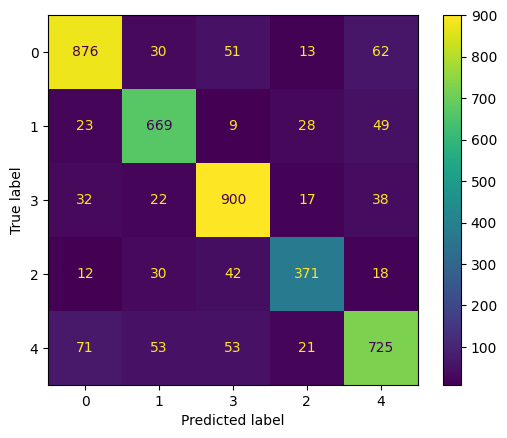

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# To define hyperparameter grid for Random Forest with distributions for RandomizedSearchCV:
params = {
    'n_estimators': randint(10, 500),
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(range(2, 11, 2)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# To run randomized search to find the best Random Forest model:
random_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=params,
    n_iter=100,  
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1,  # Use all available cores
    random_state=42
)
random_search.fit(train_X, train_y)

best_model = random_search.best_estimator_

# To evaluate the model on training data:
eval_model(train_y, best_model.predict(train_X), best_model.predict_proba(train_X), type='Training')

# To evaluate the model on test data:
eval_model(test_y, best_model.predict(test_X), best_model.predict_proba(test_X), type='Test')


### 4.  Multinomial Naive Bayes (optional):

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training results
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86
ROC AUC Score: 0.98
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.90      0.88      4164
           1       0.84      0.79      0.81      3131
           2       0.89      0.89      0.89      4077
           3       0.82      0.85      0.84      1871
           4       0.85      0.84      0.85      3614

    accuracy                           0.86     16857
   macro avg       0.85      0.85      0.85     16857
weighted avg       0.86      0.86      0.86     16857

Test results
Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1 Score: 0.76
ROC AUC Score: 0.94
Classification Report:               precision    recall  f1-score   support

           0       0.77      0.85      0.81      1032
           1       0.69      0.64      0.66       778
           2       0.82      0.81      0.82      1009

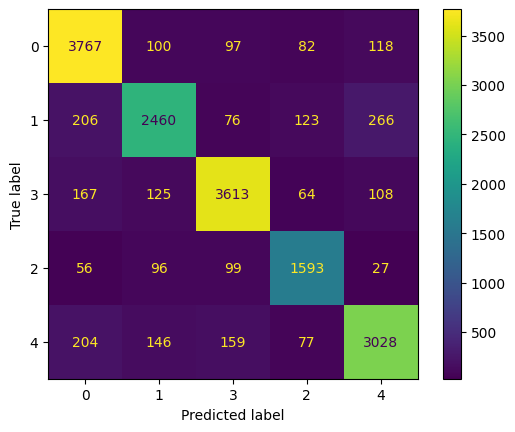

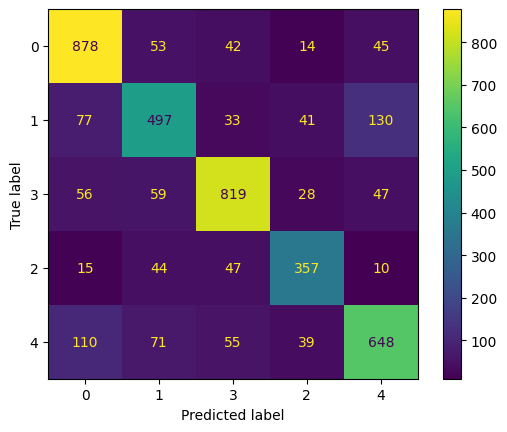

In [68]:
# To define hyperparameter grid for Gaussian Naive Bayes:
params = {
    'alpha': [0.1, 0.5, 1, 2, 5],
    'fit_prior': [True, False]
}

# To run grid search to find the best Gaussian Naive Bayes model:
model = run_model(MultinomialNB(), params)

# To evaluate the model on training data:
eval_model(train_y, model.predict(train_X), model.predict_proba(train_X), type='Training')

# To evaluate the model on test data:
eval_model(test_y, model.predict(test_X), model.predict_proba(test_X), type='Test')

### Findings:

| Model | Accuracy | Precision | Recall | F1 Score | ROC AUC Score |
|-------|----------|-----------|--------|---------|--------------|
| Logistic Regression | 0.93 | 0.93 | 0.93 | 0.93 | 0.99 |
| Decision Tree  | 0.77 | 0.77 | 0.77 | 0.77 | 0.91 |
| Random Forest | 0.84 | 0.84 | 0.84 | 0.84 | 0.97 |
| Multinomial Naive Bayes | 0.76 | 0.76 | 0.76 | 0.76 | 0.94 |


### Conclusion:
This project aims to provide insights into the effectiveness of different models for automatic ticket classification. We can observe that Logistic Regression is performing the best. Therefore, we will use Logistic Regression model to predict the topics for the new complaints.


### Model Inference:

In [76]:
# To appy the best model on the Custom Text:
# We will use the Logistic Regression model as it has the best performance:
df_complaints = pd.DataFrame({'complaints': ["I would like to update my phone number registered with the bank", 
                                  "The bill amount on my credit card was debited twice. Please look into the matter and resolve it as soon as possible.",
                                  "I would like to open a salary account at your downtown branch. Could you please provide me with the procedure?",
                                  "I received a fraudulent email yesterday about renewing my services",
                                  "How can I find out my credit information?",
                                  "I need to find out how many bank branches there are in Japan and where they are located."]})

In [77]:
def predict_lr(text):
    # To define topic names based on their numerical representation:
    Topic_names = {0:'Bank account services', 1:'Others', 2:'Mortgage/Loan', 3:'Credit card or prepaid card', 4:'Theft/Dispute Reporting'}
    
    # To vectorize the input text using the CountVectorizer fitted on the training data:
    X_new_counts = count_vect.transform(text)
    
    # To transform the word vector to TF-IDF representation:
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)
    
    # To predict the topic using the logistic regression model:
    predicted = model.predict(X_new_tfidf)
    
    # To map the predicted topic to its corresponding category name and return:
    return Topic_names[predicted[0]]

In [78]:
# To apply the predict_lr function to each complaint and store the predicted topics in a new column 'tag':
df_complaints['tag'] = df_complaints['complaints'].apply(lambda x: predict_lr([x]))

# To display the DataFrame with the added 'tag' column containing the predicted topics for each complaint:
df_complaints

,complaints,tag
0,I would like to update my phone number registered with the bank,Bank account services
1,The bill amount on my credit card was debited twice. Please look into the matter and resolve it as soon as possible.,Theft/Dispute Reporting
2,I would like to open a salary account at your downtown branch. Could you please provide me with the procedure?,Bank account services
3,I received a fraudulent email yesterday about renewing my services,Credit card or prepaid card
4,How can I find out my credit information?,Others
5,I need to find out how many bank branches there are in Japan and where they are located.,Bank account services


### Technologies Used:
- Python, version 3 
- NumPy for numerical computations
- Matplotlib and seaborn for data visualization
- Pandas for data manipulation
- Statsmodels for statistical modeling
- Sklearn for machine learning tasks
- NLTK (Natural Language Toolkit) and spaCy
- Jupyter Notebook for interactive analysis

### References:
- Python documentations
- Exploratory Data Analysis
- Stack Overflow
- NLTK (Natural Language Toolkit)
- spaCy 
- Medium NLP Articles 

### Contact:
Created by https://github.com/Erkhanal - feel free to contact!